In [1]:
import pathlib
import requests

import graphviz
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, metrics, model_selection
from sklearn import pipeline, preprocessing, tree

# Decision Trees

[Decision Trees](https://scikit-learn.org/stable/modules/tree.html) are a non-parametric supervised learning method used for [classification](https://scikit-learn.org/stable/modules/tree.html#tree-classification) and [regression](https://scikit-learn.org/stable/modules/tree.html#tree-regression). The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

## Training and Visualizing a Decision Tree

In [2]:
iris_data = datasets.load_iris(
    as_frame=True
)

In [3]:
features_df = iris_data.data
target = iris_data.target

In [4]:
features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
classifier = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
_ = classifier.fit(features_df, target)

In [7]:
_ = tree.export_graphviz(
    classifier,
    out_file="iris-tree.dot",
    feature_names=features_df.columns,
    class_names=iris_data.target_names,
    rounded=True,
    filled=True
)

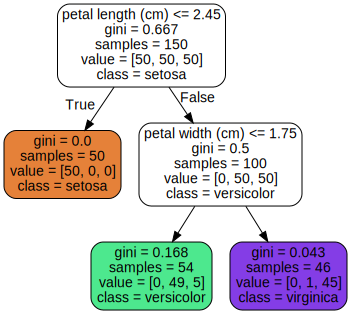

In [8]:
(
    graphviz.Source
            .from_file("iris-tree.dot")
)

In [9]:
help(classifier.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For lea

## Making Predictions

In [10]:
classifier.predict(features_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Predicting Class Probabilities

In [11]:
classifier.predict_proba(features_df)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

## Regularization

In [12]:
tree.DecisionTreeClassifier?

In [13]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [14]:
classifier = tree.DecisionTreeClassifier()
_ = classifier.fit(features_df, target)
metrics.accuracy_score(
    target,
    classifier.predict(features_df),
)

1.0

In [15]:
classifier = tree.DecisionTreeClassifier()
cv_scores = model_selection.cross_val_score(
    classifier,
    features_df,
    target,
    cv=5,
    n_jobs=-1,
    scoring="accuracy"
)

In [16]:
cv_scores

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [17]:
np.mean(cv_scores)

np.float64(0.9666666666666668)

## Exercise

Fit a decision tree classifier to the following dataset. Select an appropriate scoring metric and evaluate the performance of your classifier using cross-validation. Is your classifier under-fitting? Over-fitting? Tune the regularization hyperparameters to improve the performance of your classifier.

In [18]:
datasets.load_breast_cancer?

In [19]:
breast_cancer_data = datasets.load_breast_cancer(
    as_frame=True
)

In [20]:
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

### Solution

First, we fit and evaluate a default decision tree classifier.

In [21]:
features_df = breast_cancer_data.data
target = breast_cancer_data.target

In [22]:
classifier = tree.DecisionTreeClassifier()
_ = classifier.fit(features_df, target)

metrics.recall_score(
    target,
    classifier.predict(features_df)
)

1.0

In [23]:
# default classifier with no-regularization
classifier = tree.DecisionTreeClassifier()
cv_scores = model_selection.cross_val_score(
    classifier,
    features_df,
    target,
    cv=5,
    n_jobs=-1,
    scoring="recall"
)
print(np.mean(cv_scores))

0.9242175273865415


Looks like the default decision tree classifier, without any regularization is over-fitting and we need to regularize. Code in the cell below can be used to experiment with different regularization strategies through "hand-tuning" individual hyper-parameters.

In [24]:
classifier = tree.DecisionTreeClassifier(
    max_depth=None,
    min_samples_leaf=0.04,
    min_samples_split=2,
)
cv_scores = model_selection.cross_val_score(
    classifier,
    features_df,
    target,
    cv=5,
    n_jobs=-1,
    scoring="recall"
)
print(np.mean(cv_scores))

0.9327856025039123


In [25]:
classifier = tree.DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=0.04,
)
_ = classifier.fit(features_df, target)

_ = tree.export_graphviz(
    classifier,
    out_file="breast-cancer-tree.dot",
    feature_names=features_df.columns,
    class_names=breast_cancer_data.target_names,
    rounded=True,
    filled=True
)

_ = (
    graphviz.Source
            .from_file("breast-cancer-tree.dot")
)

Next, we can use grid search to automate the process of hyper-parameter tuning for our decision tree.

In [26]:
classifier = tree.DecisionTreeClassifier()

tuned_decision_tree = model_selection.GridSearchCV(
    classifier,
    param_grid=[
      {
          "max_depth": [1, 2, 4, None],
          "criterion": ["gini", "entropy"],
          "min_samples_split": [2, 0.01, 0.04, 0.16],
          "min_samples_leaf": [1, 0.01, 0.04, 0.16],
      },
    ],
    cv=5,
    scoring="recall",
    n_jobs=-1,
)

In [27]:
_ = tuned_decision_tree.fit(
    features_df,
    target,
)

In [28]:
tuned_decision_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01}

In [29]:
tuned_decision_tree.best_score_

np.float64(0.9607589984350549)

In [30]:
_ = tree.export_graphviz(
    tuned_decision_tree.best_estimator_,
    out_file="best-breast-cancer-tree.dot",
    feature_names=features_df.columns,
    class_names=breast_cancer_data.target_names,
    rounded=True,
    filled=True
)

_ = (
    graphviz.Source
            .from_file("best-breast-cancer-tree.dot")
)

## Understanding Feature Importance

One of the nice features of decision trees is that they provide a way to measure the importance of each of feature. Understanding feature importance is a topic all unto itself. If you are interested in pulling this thread, then I recommend that you start with [SHapley Additive Explanations (SHAP)](https://shap.readthedocs.io/en/latest/index.html) and then take a look through [*Interpretable Machine Learning*](https://christophm.github.io/interpretable-ml-book/).

In [31]:
classifier = tree.DecisionTreeClassifier()
_ = classifier.fit(features_df, target)

In [32]:
pd.Series(
    tuned_decision_tree.best_estimator_.feature_importances_,
    index=breast_cancer_data.data.columns
).sort_values(
    ascending=False
)

,0
worst perimeter,0.749118
worst concave points,0.119576
worst texture,0.062254
worst smoothness,0.048740
area error,0.016214
mean radius,0.004099
mean compactness,0.000000
mean concavity,0.000000
mean symmetry,0.000000
mean concave points,0.000000


## Exercise

Grow a forest by following these steps:

1. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 80% of the training instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.

2. Train one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse than the first decision tree, achieving only about 80% accuracy.


3. Now comes the magic. For each test set instance, generate the predictions of the 1,000 decision trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.

4. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model. Congratulations, you have trained a random forest classifier!